#### 2


### a

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


In [233]:
dataset = pd.read_csv('../Data_Raw/diabetes.csv')

In [234]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [236]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[cols_with_zeros] = dataset[cols_with_zeros].replace(0, np.nan)
     

In [237]:
print("\These are the missing values after cleaning:")
print(dataset.isnull().sum())

\These are the missing values after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [238]:
data_imputed = dataset.fillna(dataset.mean())
print("\nAll the missing Values after handling:")
print(data_imputed.isnull().sum())


All the missing Values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [239]:
cfn = 'cfndiabetes.csv'
dataset.to_csv('../Data_Clean/'+cfn, index=False)
cd = pd.read_csv('../Data_Clean/cfndiabetes.csv')
print("\nLoading the cleaned dataset:")
print(cd.head())
cd.info()


Loading the cleaned dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1  

In [240]:
np.random.seed(79)
sample = dataset.sample(25)

In [241]:
population_mean_glucose = dataset['Glucose'].mean()
population_highest_glucose = dataset['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()     

In [242]:
labels = ['Population Mean', 'Population Highest', 'Sample Mean', 'Sample Highest']
values = [population_mean_glucose, population_highest_glucose, sample_mean_glucose, sample_highest_glucose]

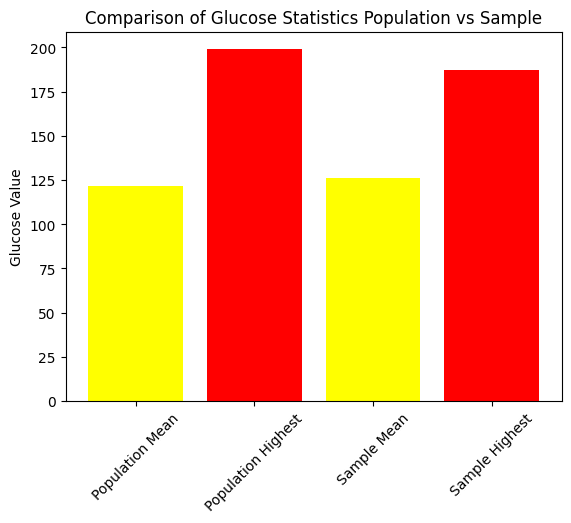

In [243]:
plt.bar(labels, values, color=['yellow', 'red', 'yellow', 'red'])
plt.title('Comparison of Glucose Statistics Population vs Sample')
plt.ylabel('Glucose Value')
plt.xticks(rotation=45)
plt.show()

### b

In [244]:
cleaned_data = pd.read_csv('../Data_Clean/cfndiabetes.csv')
np.random.seed(79)
sample = dataset.sample(25)

In [245]:
population_98th_percentile_bmi = cleaned_data['BMI'].quantile(0.98)
sample_98th_percentile_bmi = sample['BMI'].quantile(0.98)
labels = ['Population 98th Percentile BMI', 'Sample 98th Percentile BMI']
values = [population_98th_percentile_bmi, sample_98th_percentile_bmi]


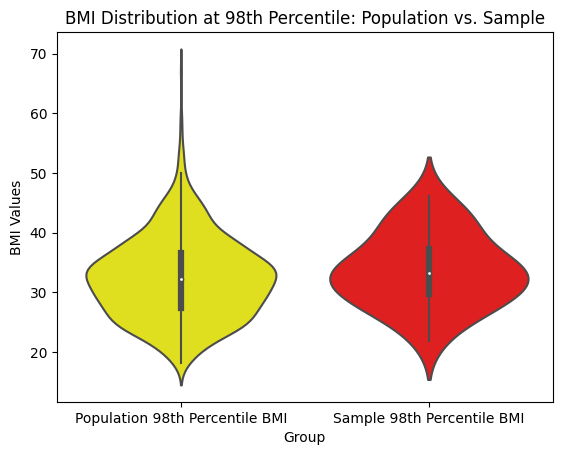

In [246]:
sns.violinplot(x=cleaned_data.index.isin(sample.index), y=cleaned_data['BMI'], palette=['yellow', 'red'])
plt.title('BMI Distribution at 98th Percentile: Population vs. Sample')
plt.xticks([0, 1], labels)
plt.ylabel('BMI Values')
plt.xlabel('Group')
plt.show()

### c


In [260]:
np.random.seed(79)
bootstrap_samples = []
for _ in range(500):
    bootstrap_sample = dataset['BloodPressure'].sample(150, replace=True)
    bootstrap_samples.append(bootstrap_sample)
print(bootstrap_samples)

[343    86.0
189    80.0
74     75.0
148    78.0
728    88.0
       ... 
447    80.0
668    58.0
198    64.0
688    74.0
88     70.0
Name: BloodPressure, Length: 150, dtype: float64, 684    82.0
147    64.0
146    80.0
686    64.0
529    65.0
       ... 
554    64.0
418    68.0
39     72.0
173    60.0
329    70.0
Name: BloodPressure, Length: 150, dtype: float64, 588     86.0
229     80.0
670     68.0
91      80.0
522      NaN
       ...  
38      68.0
140     78.0
307     68.0
360     64.0
549    110.0
Name: BloodPressure, Length: 150, dtype: float64, 143     66.0
361     70.0
223     60.0
23      80.0
213     65.0
       ...  
161     74.0
303     98.0
207    104.0
759     92.0
754     78.0
Name: BloodPressure, Length: 150, dtype: float64, 274     70.0
408     74.0
703      NaN
84     108.0
335     76.0
       ...  
223     60.0
326     64.0
566     72.0
287     86.0
255     64.0
Name: BloodPressure, Length: 150, dtype: float64, 472    66.0
631    78.0
504    78.0
766    60.0
470    8

In [261]:
bootstrap_means = [sample.mean() for sample in bootstrap_samples]
bootstrap_std_devs = [sample.std() for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]
print(bootstrap_percentiles)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [249]:
population_mean = dataset['BloodPressure'].mean()
population_std_dev = dataset['BloodPressure'].std()
population_percentile = np.percentile(dataset['BloodPressure'], 95)

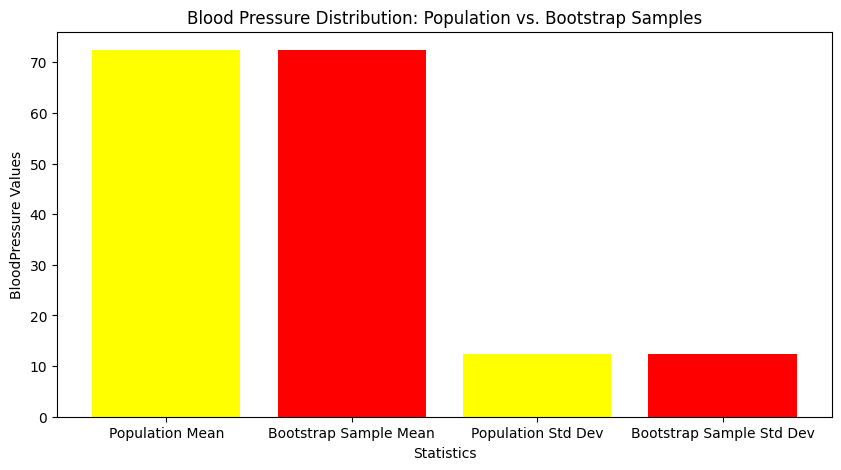

In [256]:
labels = ['Population Mean', 'Bootstrap Sample Mean', 'Population Std Dev', 'Bootstrap Sample Std Dev', 'Population 95th Percentile', 'Bootstrap Sample 95th Percentile']
values = [population_mean, np.mean(bootstrap_means), population_std_dev, np.mean(bootstrap_std_devs), population_percentile, np.mean(bootstrap_percentiles)]
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['yellow', 'red', 'yellow', 'red', 'yellow', 'red'])
plt.title('Blood Pressure Distribution: Population vs. Bootstrap Samples')
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.show()